In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn import metrics, preprocessing


In [2]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 3417-05D0

 Directory of D:\PythonTraining\Signate\【第1回_Beginner限定コンペ】銀行の顧客ターゲティング\-1-_Beginner-

2020/08/16  12:28    <DIR>          .
2020/08/16  12:28    <DIR>          ..
2020/08/14  07:31               238 .gitignore
2020/08/16  12:12    <DIR>          .ipynb_checkpoints
2020/08/14  08:07           224,463 20200814_001.ipynb
2020/08/15  11:55            21,817 20200814_002.ipynb
2020/08/15  12:55           519,897 20200815_001.ipynb
2020/08/15  14:12            42,626 20200815_002_tensorflow.ipynb
2020/08/15  15:12           211,220 20200815_003.ipynb
2020/08/15  15:12           216,290 20200815_004.ipynb
2020/08/16  12:12         2,992,540 20200816_001.ipynb
2020/08/16  12:28        11,283,732 20200816_002.ipynb
2020/08/15  14:13    <DIR>          old
2020/08/15  15:00           479,222 submit_20200813_2.csv
2020/08/14  07:57           484,815 submit_20200814_1.csv
2020/08/15  15:05           479,222 submit_20200815_1.csv


In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)
train.shape, test.shape, sample.shape

((27100, 17), (18050, 16), (18050, 2))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27100 entries, 0 to 27099
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27100 non-null  int64 
 1   job        27100 non-null  object
 2   marital    27100 non-null  object
 3   education  27100 non-null  object
 4   default    27100 non-null  object
 5   balance    27100 non-null  int64 
 6   housing    27100 non-null  object
 7   loan       27100 non-null  object
 8   contact    27100 non-null  object
 9   day        27100 non-null  int64 
 10  month      27100 non-null  object
 11  duration   27100 non-null  int64 
 12  campaign   27100 non-null  int64 
 13  pdays      27100 non-null  int64 
 14  previous   27100 non-null  int64 
 15  poutcome   27100 non-null  object
 16  y          27100 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.7+ MB


In [5]:
test['y'] = -999

In [6]:
all_df = pd.concat([train, test], axis=0)
all_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure,-999
18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown,-999
18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown,-999


In [7]:
cols_o = all_df.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [8]:
for col in cols_o:
    print(col, all_df[col].unique())


job ['services' 'entrepreneur' 'management' 'technician' 'unemployed'
 'blue-collar' 'admin.' 'retired' 'self-employed' 'housemaid' 'student'
 'unknown']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['cellular' 'unknown' 'telephone']
month ['nov' 'aug' 'may' 'apr' 'sep' 'jun' 'jul' 'feb' 'oct' 'jan' 'mar']
poutcome ['other' 'unknown' 'failure' 'success']


# データ解析

In [9]:
# for col in cols_o:
#     le = preprocessing.LabelEncoder()
#     all_df[col] = le.fit_transform(all_df[col])
    
# all_df

import category_encoders as ce
ce_ohe = ce.OneHotEncoder(handle_unknown='impute')
all_df = ce_ohe.fit_transform(all_df)
all_df

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,0,0,0,0,0,0,0,0,...,0,101,3,498,0,1,0,0,0,0
1,29,0,1,0,0,0,0,0,0,0,...,0,158,2,702,0,0,1,0,0,1
2,35,0,0,1,0,0,0,0,0,0,...,0,351,1,826,0,0,0,1,0,0
3,31,0,0,0,1,0,0,0,0,0,...,0,658,2,120,0,0,0,1,0,0
4,48,0,0,0,0,1,0,0,0,0,...,0,177,1,273,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,0,0,0,0,0,0,0,0,1,...,0,101,2,417,0,0,0,1,0,-999
18046,34,0,0,0,0,0,1,0,0,0,...,0,345,1,815,0,0,1,0,0,-999
18047,34,0,0,0,0,0,0,1,0,0,...,0,121,2,370,0,0,1,0,0,-999


In [10]:
train_df = all_df[all_df['y'] != -999]

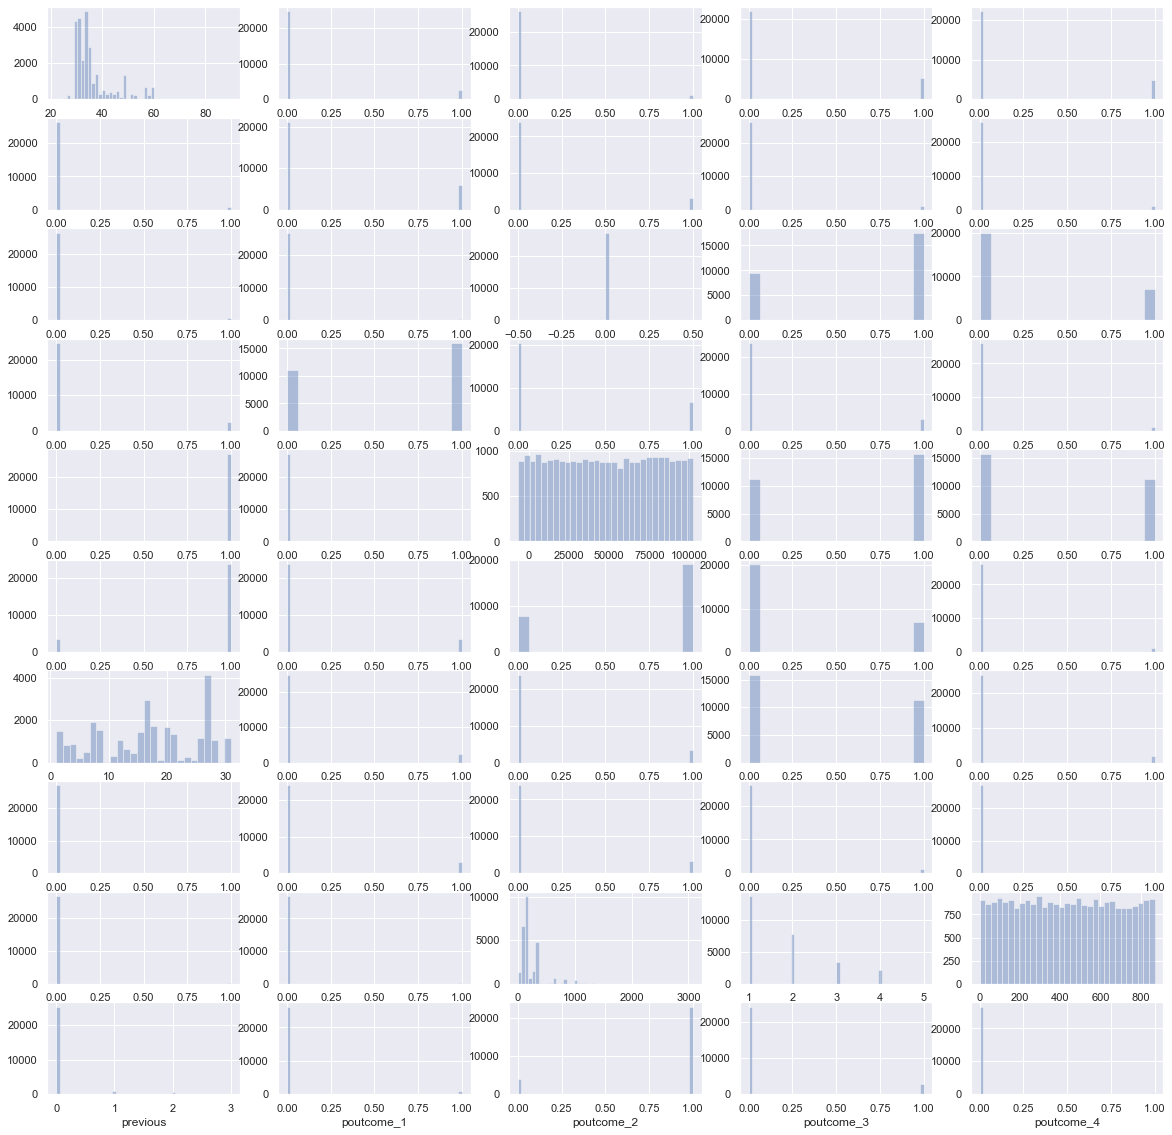

In [11]:
plt.figure(figsize=(20, 20))

for idx, col in enumerate(train_df.drop('y', axis=1).columns):
    plt.subplot(10, 5, idx+1)
    sns.distplot(train_df[col], kde=False)

plt.show()

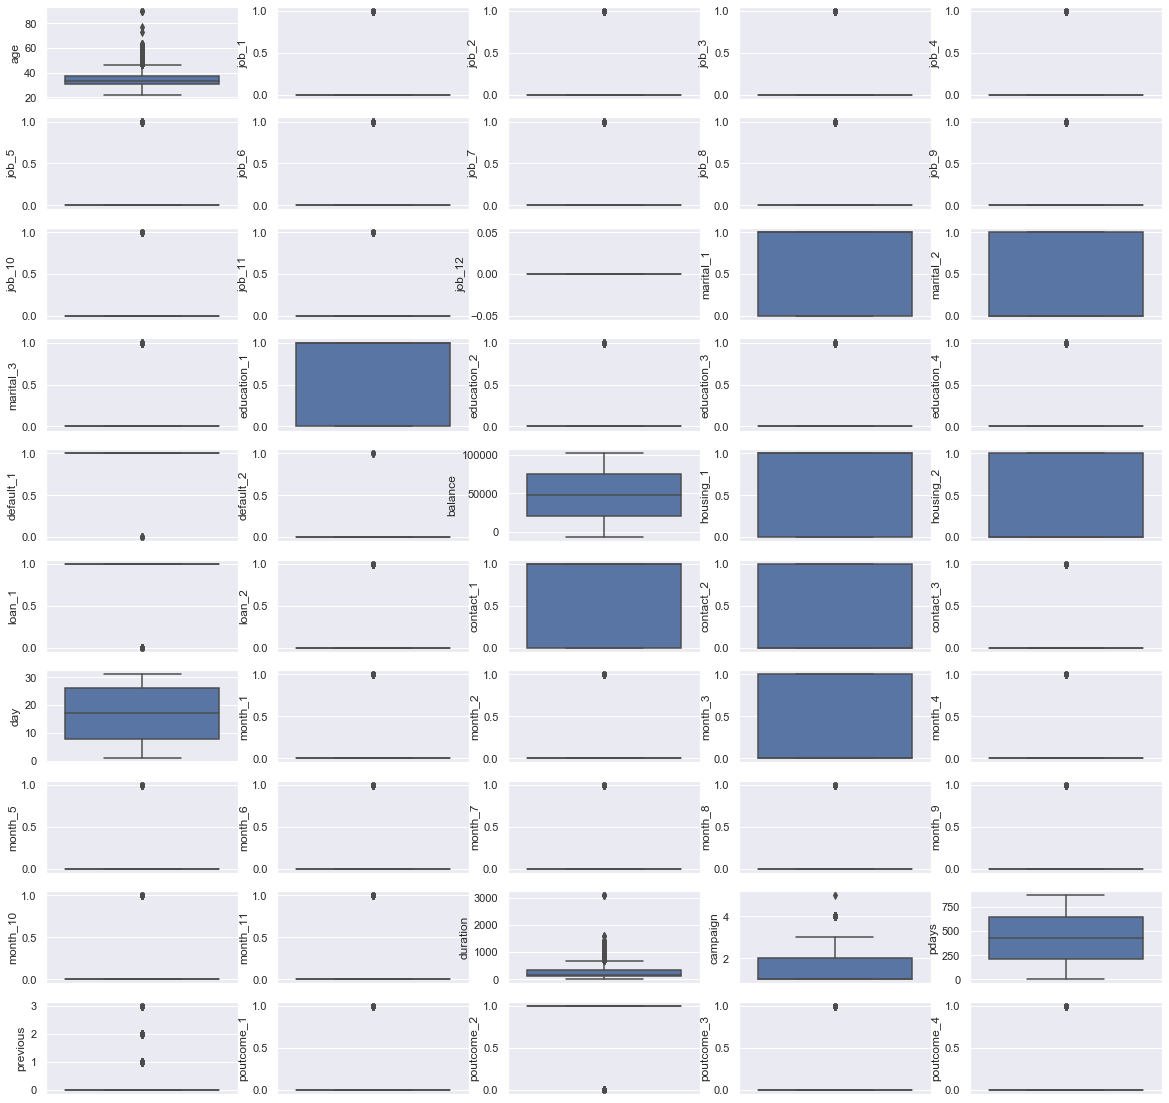

In [12]:
plt.figure(figsize=(20, 20))

for idx, col in enumerate(train_df.drop('y', axis=1).columns):
    plt.subplot(10, 5, idx+1)
    sns.boxplot(y=col, data=train_df)

plt.show()

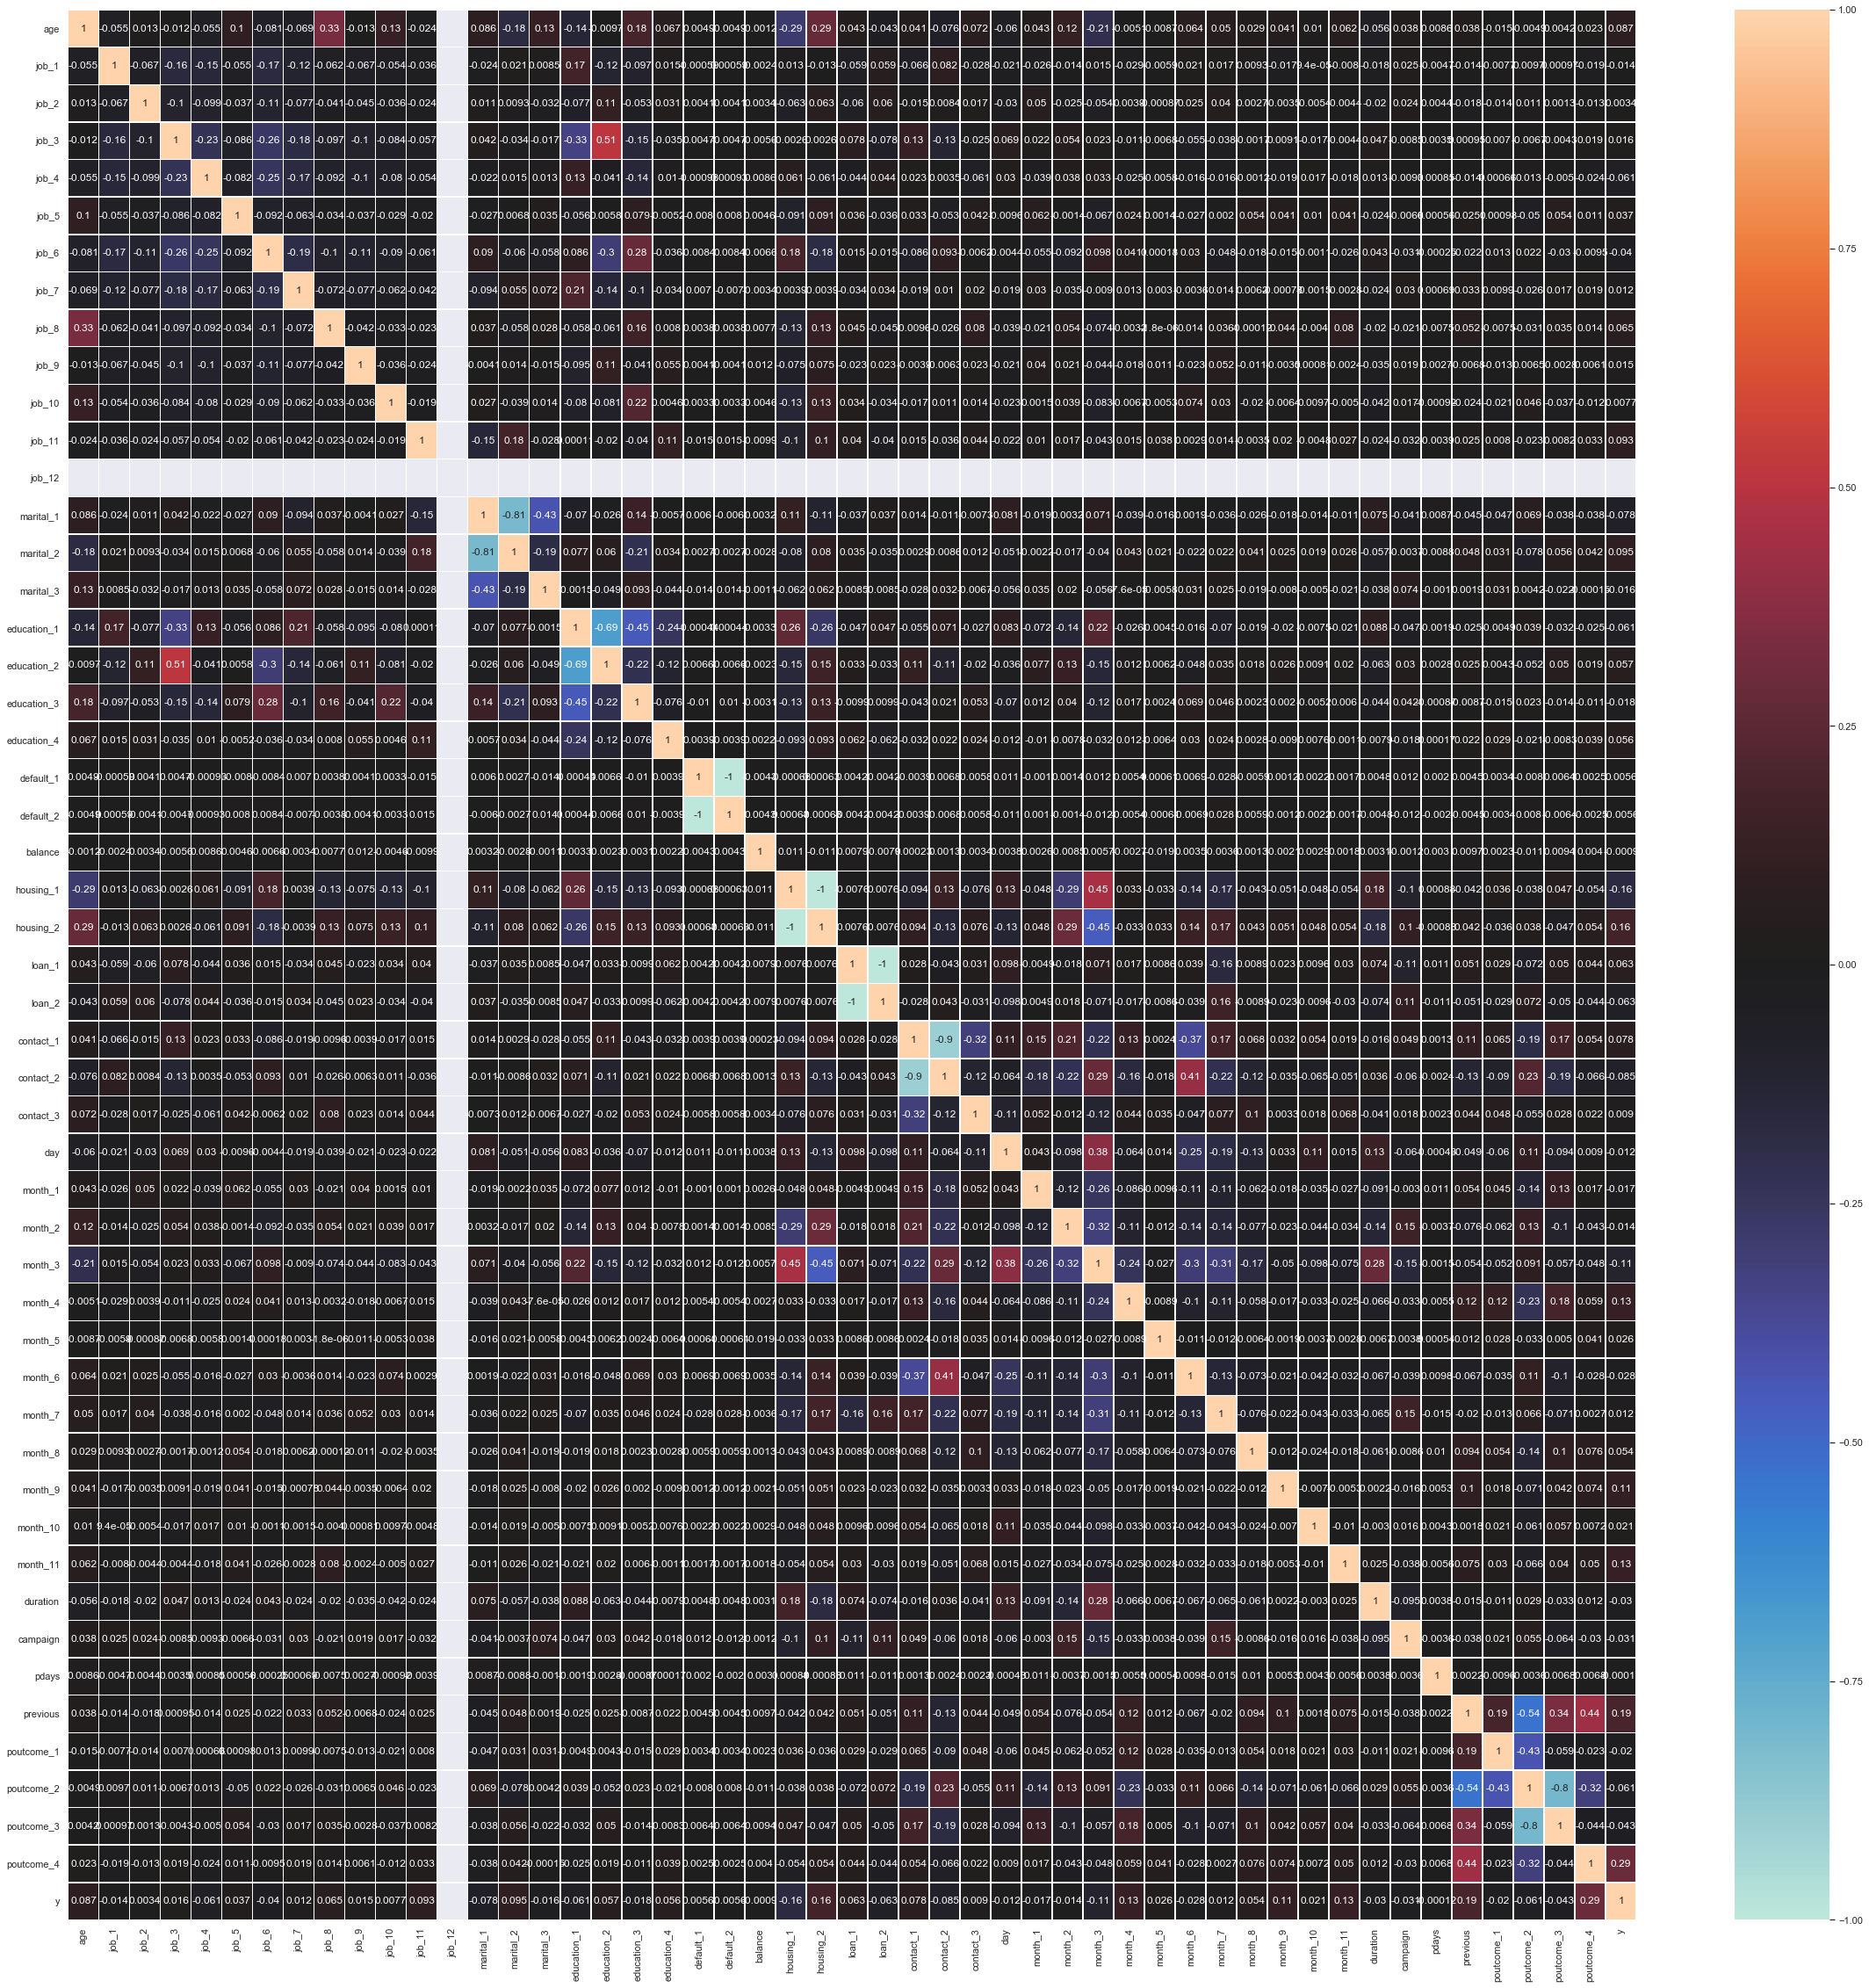

In [13]:
plt.figure(figsize=(40, 40))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, center=0, vmin=-1, vmax=1)

In [14]:
train_corr = train_df.corr()
train_corr

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
age,1.000000,-0.054810,0.012629,-0.011813,-0.055308,0.100122,-0.081459,-0.069166,0.328365,-0.013493,...,0.062101,-0.055642,0.037633,0.008551,0.037545,-0.014625,-0.004895,0.004227,0.023127,0.086668
job_1,-0.054810,1.000000,-0.066831,-0.157021,-0.149089,-0.055065,-0.168129,-0.115634,-0.062129,-0.067072,...,-0.007984,-0.017717,0.025356,-0.004706,-0.014299,-0.007692,0.009689,0.000965,-0.018657,-0.014142
job_2,0.012629,-0.066831,1.000000,-0.104595,-0.099311,-0.036680,-0.111994,-0.077026,-0.041385,-0.044678,...,-0.004377,-0.019928,0.024020,0.004450,-0.018476,-0.014032,0.010568,0.001339,-0.013492,0.003398
job_3,-0.011813,-0.157021,-0.104595,1.000000,-0.233333,-0.086181,-0.263133,-0.180975,-0.097235,-0.104972,...,-0.004417,0.046763,-0.008452,0.003491,0.000949,0.007042,-0.006725,-0.004316,0.019172,0.016039
job_4,-0.055308,-0.149089,-0.099311,-0.233333,1.000000,-0.081827,-0.249840,-0.171833,-0.092323,-0.099669,...,-0.018190,0.013349,-0.009295,0.000848,-0.013692,0.000664,0.012592,-0.005028,-0.023823,-0.061462
job_5,0.100122,-0.055065,-0.036680,-0.086181,-0.081827,1.000000,-0.092277,-0.063466,-0.034099,-0.036812,...,0.041313,-0.023729,-0.006626,0.000561,0.025014,0.000978,-0.050318,0.054092,0.011136,0.036743
job_6,-0.081459,-0.168129,-0.111994,-0.263133,-0.249840,-0.092277,1.000000,-0.193778,-0.104114,-0.112398,...,-0.026215,0.043098,-0.031010,-0.000253,-0.022315,0.012664,0.022476,-0.029739,-0.009454,-0.039639
job_7,-0.069166,-0.115634,-0.077026,-0.180975,-0.171833,-0.063466,-0.193778,1.000000,-0.071607,-0.077304,...,-0.002804,-0.024489,0.030437,0.000686,0.032501,0.009903,-0.025664,0.016582,0.018785,0.011805
job_8,0.328365,-0.062129,-0.041385,-0.097235,-0.092323,-0.034099,-0.104114,-0.071607,1.000000,-0.041535,...,0.079618,-0.019933,-0.021373,-0.007525,0.052294,-0.007503,-0.031265,0.035347,0.013689,0.065412
job_9,-0.013493,-0.067072,-0.044678,-0.104972,-0.099669,-0.036812,-0.112398,-0.077304,-0.041535,1.000000,...,-0.002435,-0.035122,0.018726,0.002663,-0.006814,-0.013184,0.006520,-0.002789,0.006137,0.014510


In [15]:
train_corr.drop('y', axis=0).index

Index(['age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'default_1', 'default_2', 'balance', 'housing_1',
       'housing_2', 'loan_1', 'loan_2', 'contact_1', 'contact_2', 'contact_3',
       'day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'poutcome_4'],
      dtype='object')

In [16]:
train_corr.drop('y', axis=1).columns

Index(['age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'default_1', 'default_2', 'balance', 'housing_1',
       'housing_2', 'loan_1', 'loan_2', 'contact_1', 'contact_2', 'contact_3',
       'day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'poutcome_4'],
      dtype='object')

In [17]:
# for row in train_corr.drop('y', axis=0).index:
#     for col in train_corr.drop('y', axis=1).columns:
#         if row != col:
#             if abs(train_corr.loc[col, row]) > 0.1:
#                 print(col, '/' , row, ':', train_corr.loc[col, row])
#                 plt.figure(figsize=(20, 4))
#                 sns.violinplot(data=train_df, y=col, x=row, hue='y', split=True)
#                 plt.show()


In [18]:
all_df.describe(include='all')

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,...,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,36.085670,0.092846,0.041728,0.196523,0.180022,0.028926,0.222436,0.118250,0.036788,0.041860,...,0.007309,229.321240,1.773533,433.957342,0.087774,0.030299,0.853267,0.099601,0.016833,-399.331960
std,7.835323,0.290220,0.199968,0.397373,0.384210,0.167600,0.415887,0.322908,0.188244,0.200272,...,0.085180,206.488239,0.947974,251.851537,0.369888,0.171411,0.353844,0.299471,0.128646,489.406473
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,121.000000,1.000000,216.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-999.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,158.000000,1.000000,434.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,345.000000,2.000000,652.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3076.000000,5.000000,870.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


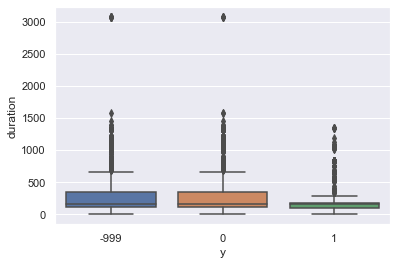

In [19]:
sns.boxplot(data=all_df, y='duration', x='y')

In [20]:
all_df[all_df['duration'] > 1000]

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
id,,,,,,,,,,,,,,,,,,,,,
40,31,0,0,0,0,0,0,1,0,0,...,0,1074,1,164,0,0,1,0,0,0
230,32,1,0,0,0,0,0,0,0,0,...,0,1045,2,245,0,0,1,0,0,0
309,31,0,0,0,0,0,1,0,0,0,...,0,1045,1,624,0,0,1,0,0,0
353,34,0,0,0,1,0,0,0,0,0,...,0,1045,2,572,0,0,1,0,0,0
429,31,0,0,0,0,0,1,0,0,0,...,0,1220,2,744,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17662,34,0,0,1,0,0,0,0,0,0,...,0,1045,2,745,0,0,1,0,0,-999
17752,34,0,0,1,0,0,0,0,0,0,...,0,1045,1,708,0,0,1,0,0,-999
17778,53,1,0,0,0,0,0,0,0,0,...,0,1027,2,390,0,0,1,0,0,-999


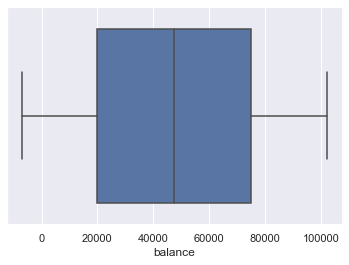

In [21]:
sns.boxplot(all_df['balance'])

# データ加工

In [22]:
all_df['balance'] = all_df['balance'].apply(lambda x: x if x > 0 else 0)
all_df['pdays'] = all_df['pdays'].apply(lambda x: x if x > 0 else 0)
all_df[all_df['duration'] > 1000]

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
id,,,,,,,,,,,,,,,,,,,,,
40,31,0,0,0,0,0,0,1,0,0,...,0,1074,1,164,0,0,1,0,0,0
230,32,1,0,0,0,0,0,0,0,0,...,0,1045,2,245,0,0,1,0,0,0
309,31,0,0,0,0,0,1,0,0,0,...,0,1045,1,624,0,0,1,0,0,0
353,34,0,0,0,1,0,0,0,0,0,...,0,1045,2,572,0,0,1,0,0,0
429,31,0,0,0,0,0,1,0,0,0,...,0,1220,2,744,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17662,34,0,0,1,0,0,0,0,0,0,...,0,1045,2,745,0,0,1,0,0,-999
17752,34,0,0,1,0,0,0,0,0,0,...,0,1045,1,708,0,0,1,0,0,-999
17778,53,1,0,0,0,0,0,0,0,0,...,0,1027,2,390,0,0,1,0,0,-999


In [23]:
all_df.describe(include='all')

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,...,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,36.085670,0.092846,0.041728,0.196523,0.180022,0.028926,0.222436,0.118250,0.036788,0.041860,...,0.007309,229.321240,1.773533,433.958494,0.087774,0.030299,0.853267,0.099601,0.016833,-399.331960
std,7.835323,0.290220,0.199968,0.397373,0.384210,0.167600,0.415887,0.322908,0.188244,0.200272,...,0.085180,206.488239,0.947974,251.849550,0.369888,0.171411,0.353844,0.299471,0.128646,489.406473
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,121.000000,1.000000,216.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-999.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,158.000000,1.000000,434.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,345.000000,2.000000,652.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3076.000000,5.000000,870.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# トレーニング

In [24]:
X = all_df[all_df['y'] != -999].drop('y', axis=1)
y = all_df[all_df['y'] != -999]['y']
X_Test = all_df[all_df['y'] == -999].drop('y', axis=1)

pred_list = {}

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [26]:
parameters = {
    'max_depth': list(range(2, 11)),
}

## LightGBM

In [27]:
lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [28]:
gcv.best_params_

{'max_depth': 5}

In [29]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[0.84845913 0.87030951 0.89396589 0.92079543 0.93754565 0.94374278
 0.94837416 0.9497561  0.95111444]
[0.83708165 0.84666348 0.84903342 0.84960063 0.84685521 0.84692426
 0.846322   0.84719453 0.84704847]


([<matplotlib.axis.XTick at 0x1b176c0ec88>,
 <a list of 9 Text xticklabel objects>)

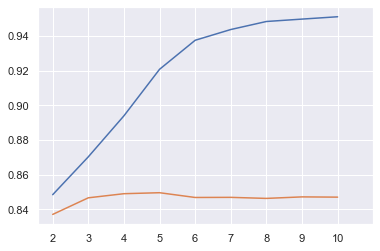

In [30]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

In [31]:
y_pred = gcv.predict_proba(X)[:,1]
y_pred

array([0.02340284, 0.2010406 , 0.00447984, ..., 0.07784051, 0.06836832,
       0.00280986])

In [32]:
pred_list['lgb'] = y_pred

## XGBoost

In [33]:
xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [34]:
gcv2.best_params_

{'max_depth': 2}

In [35]:
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[0.87225967 0.90179999 0.93342786 0.96485672 0.98604571 0.99654379
 0.99939521 0.99987429 0.99999761]
[0.85021828 0.85012414 0.84596188 0.83982098 0.83564786 0.83035342
 0.82467285 0.82058014 0.81793842]


([<matplotlib.axis.XTick at 0x1b1789a7e88>,
 <a list of 9 Text xticklabel objects>)

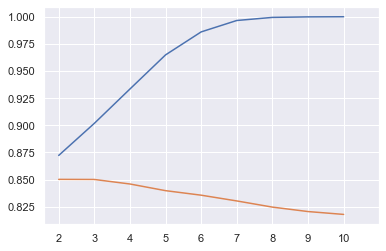

In [36]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

In [37]:
y_pred2 = gcv2.predict_proba(X)[:,1]
y_pred2

array([0.00876867, 0.16660169, 0.00458612, ..., 0.07380428, 0.05030134,
       0.00624965], dtype=float32)

In [38]:
pred_list['xgb'] = y_pred2

In [39]:
y_pred2.shape, y.shape

((27100,), (27100,))

## Random Forest

In [40]:
pred_list = pd.DataFrame(pred_list)

In [41]:
rf = RandomForestClassifier()

gcv3 = GridSearchCV(rf, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(pred_list, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [42]:
gcv3.best_params_

{'max_depth': 8}

In [43]:
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[0.87225967 0.90179999 0.93342786 0.96485672 0.98604571 0.99654379
 0.99939521 0.99987429 0.99999761]
[0.85021828 0.85012414 0.84596188 0.83982098 0.83564786 0.83035342
 0.82467285 0.82058014 0.81793842]


([<matplotlib.axis.XTick at 0x1b17c1bcf48>,
 <a list of 9 Text xticklabel objects>)

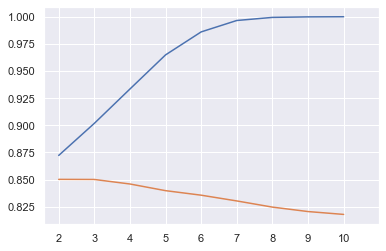

In [44]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

In [45]:
y_pred3 = gcv3.predict_proba(pred_list)[:,1]
y_pred3

array([0.01025913, 0.25266182, 0.00039329, ..., 0.06594261, 0.05544777,
       0.00025467])

## 結果確認

In [46]:
roc_auc_score(y, pred_list['lgb'])


0.9125362370907733

In [47]:
roc_auc_score(y, pred_list['xgb'])


0.8705972522113645

In [48]:
roc_auc_score(y, y_pred3)


0.9511401173320769

# 予測

In [49]:
pred_list_test = {}

In [50]:
pred_list_test['lgb'] = gcv.predict_proba(X_Test)[:, 1]

In [51]:
pred_list_test['xgb'] = gcv2.predict_proba(X_Test)[:, 1]

In [52]:
pred_list_test = pd.DataFrame(pred_list_test)
pred_list_test

,lgb,xgb
0,0.695466,0.855836
1,0.078643,0.087785
2,0.024276,0.043682
3,0.002646,0.005251
4,0.048344,0.063529
...,...,...
18045,0.005785,0.011493
18046,0.009906,0.011102
18047,0.078739,0.066752
18048,0.006204,0.005451


In [53]:
final_pred = gcv3.predict_proba(pred_list_test)[:, 1]

# 結果を格納

In [54]:
sample

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18045,18045,0
18046,18046,0
18047,18047,0
18048,18048,0


In [55]:
sample[1] = final_pred

In [56]:
sample.to_csv('submit_20200816_2.csv', header=None, index=None)